# Advertising Sales Channel Prediction

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored .

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Importing the DATASET

In [2]:
Advertising=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")

#### Checking top 5 rows data

In [3]:
Advertising.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


From the dataset we notice there are 5 columns which contains both features and one target variable. Here "sales" is the target variable which contains continuous data. For advertising we are using TV, radio and newspaper to improve the sale. The column Unnamed is taken for only index purpose and it has no relation with our target variable which is sales. So, we will drop this column.

In [4]:
Advertising.drop("Unnamed: 0",axis=1, inplace=True)

In [5]:
Advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


#  EDA

# Total Numbers of Rows and Column

In [6]:
Advertising.shape

(200, 4)

# Checking All Column Names

In [7]:
Advertising.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

# Checking Data Type of Data

In [8]:
Advertising.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

All data are of float datatype

# Checking for Null Values

In [9]:
Advertising.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

There are no null value in dataset

# Information about Data (Memory Used and Data Types)

In [10]:
Advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# Checking unique values present in the Target Variable.

In [11]:
Advertising['sales'].unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

In [12]:
# Total Values in the target variable
Advertising["sales"].value_counts()

9.7     5
11.7    4
12.9    4
15.9    4
20.7    3
       ..
17.0    1
18.3    1
22.3    1
14.0    1
25.5    1
Name: sales, Length: 121, dtype: int64

In [13]:
Advertising.loc[Advertising['sales']==" "]

,TV,radio,newspaper,sales


So we can see there are no spaces present in the dataset.

# Descriptive Statistics

# Description of Dataset

In [15]:
Advertising.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


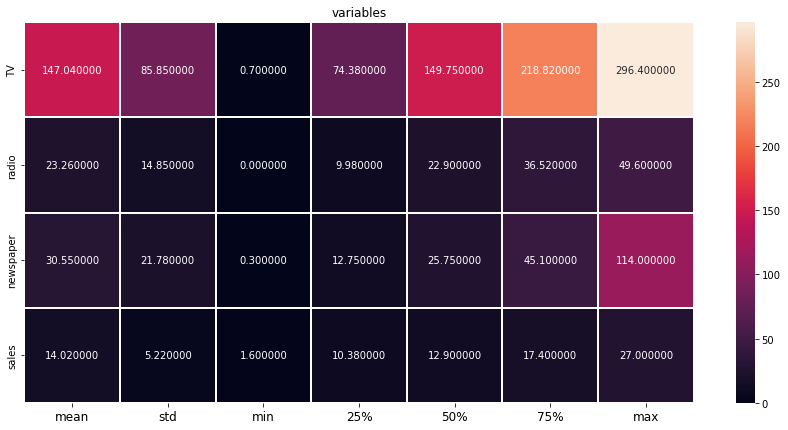

In [16]:
# describing dataset through heatmap

plt.figure(figsize=(15,7))
sns.heatmap(round(Advertising.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.xticks(fontsize=12)
plt.title('variables')
plt.savefig('heatmap.png')
plt.show()

# Outcome of Describe of Datasets:

# Checking number of unique values in all the columns

In [17]:
Advertising.nunique()

TV           190
radio        167
newspaper    172
sales        121
dtype: int64

# Data Visualization

# Histplot

<AxesSubplot:xlabel='TV', ylabel='Count'>

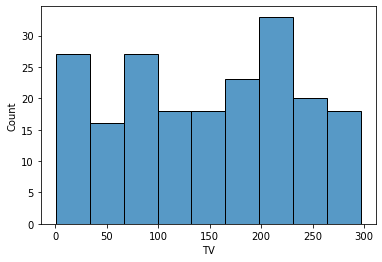

In [18]:
sns.histplot(x=Advertising['TV'])

<AxesSubplot:xlabel='radio', ylabel='Count'>

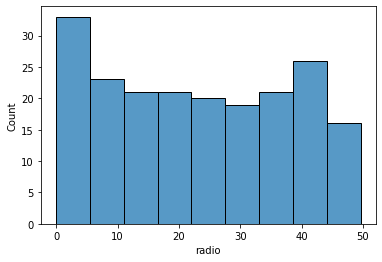

In [19]:
sns.histplot(x=Advertising['radio'])

<AxesSubplot:xlabel='newspaper', ylabel='Count'>

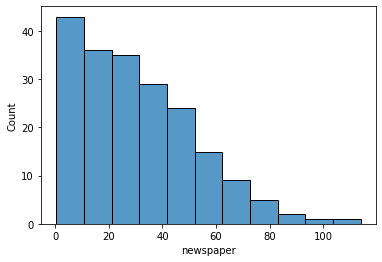

In [20]:
sns.histplot(x=Advertising['newspaper'])

The histogram represents the distribution of "newspaper" is ununiform, it is skewed positively.

# Scatterplot

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

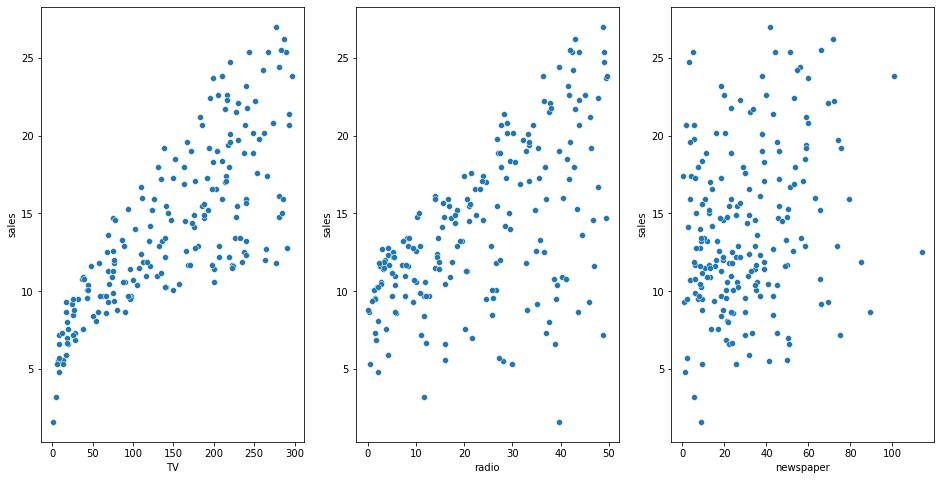

In [21]:
fig, axs=plt.subplots(1,3, figsize=(16,8))
sns.scatterplot(x="TV",y="sales",data=Advertising, ax=axs[0])
sns.scatterplot(x="radio",y="sales",data=Advertising, ax=axs[1])
sns.scatterplot(x="newspaper",y="sales",data=Advertising, ax=axs[2])

From the above graphs, it can be observed that there seems to be a linear relationship between the features TV, Radio with the sales.

In case of newspaper there is no relationship with sales which means advertising the product on newspaper will not improve our sales also we get more loss by investing money on newspaper.

<AxesSubplot:title={'center':'Comparision between TV and radio'}, xlabel='TV', ylabel='radio'>

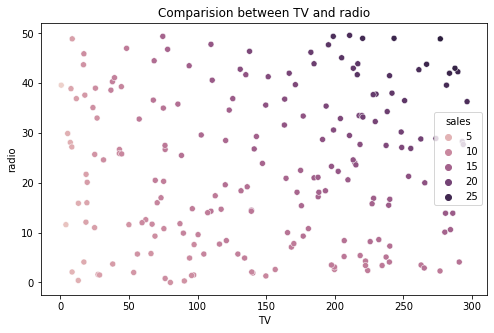

In [22]:
# Checking the relation between TV and radio on the basis of sales
plt.figure(figsize=[8,5])
plt.title('Comparision between TV and radio')
sns.scatterplot(Advertising['TV'],Advertising['radio'],hue=Advertising["sales"])

<AxesSubplot:title={'center':'Comparision between TV and radio'}, xlabel='TV', ylabel='newspaper'>

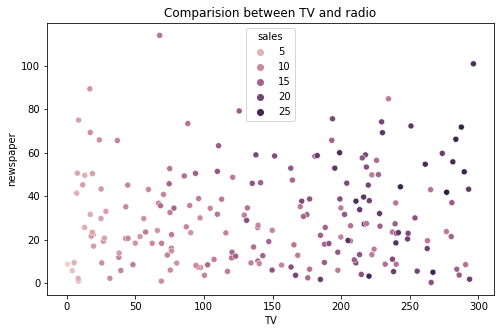

In [23]:
# Checking the relation between TV and newspaper on the basis of sales
plt.figure(figsize=[8,5])
plt.title('Comparision between TV and radio')
sns.scatterplot(Advertising['TV'],Advertising['newspaper'],hue=Advertising["sales"])

<AxesSubplot:title={'center':'Comparision between TV and radio'}, xlabel='radio', ylabel='newspaper'>

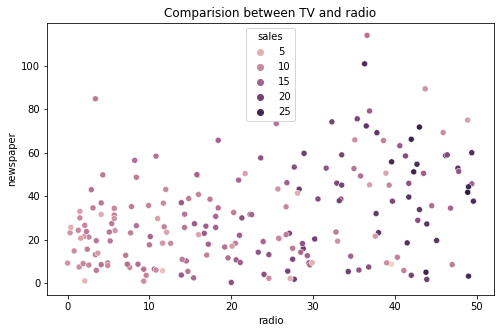

In [24]:
# Checking the relation between radio and newspaper on the basis of sales
plt.figure(figsize=[8,5])
plt.title('Comparision between TV and radio')
sns.scatterplot(Advertising['radio'],Advertising['newspaper'],hue=Advertising["sales"])

# Pairplot

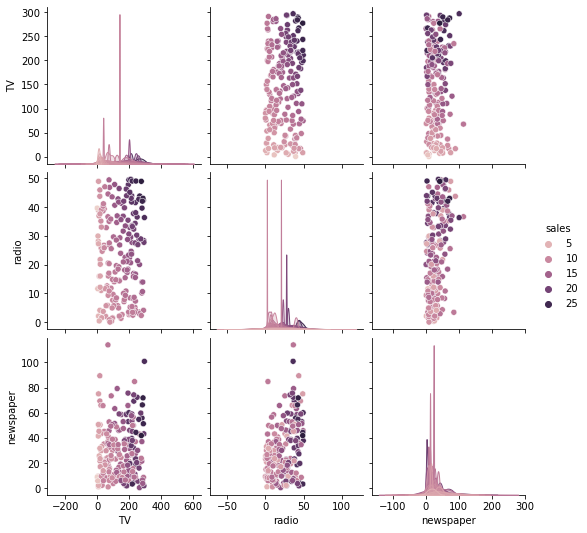

In [25]:
sns.pairplot(Advertising,hue="sales")

# Distplot

<AxesSubplot:xlabel='TV', ylabel='Density'>

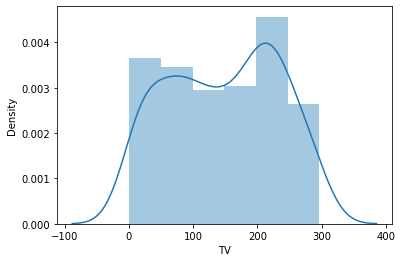

In [26]:
sns.distplot(Advertising["TV"])

<AxesSubplot:xlabel='radio', ylabel='Density'>

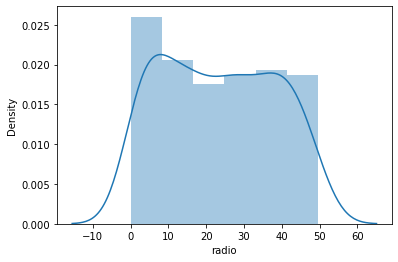

In [27]:
sns.distplot(Advertising["radio"])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

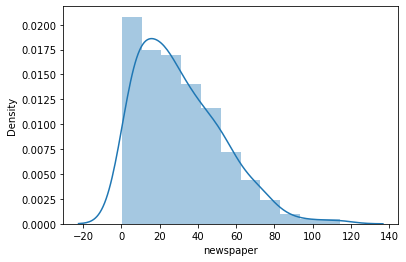

In [28]:
sns.distplot(Advertising["newspaper"])

<AxesSubplot:xlabel='sales', ylabel='Density'>

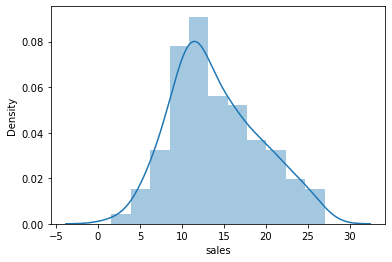

In [29]:
sns.distplot(Advertising["sales"])

We can see there are skewness present in all column.

# Checking Correlation

In [30]:
Advertising.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


This gives the correlation between the denpendent and independent variables.

In [31]:
Advertising.corr()["sales"].sort_values()

newspaper    0.228299
radio        0.576223
TV           0.782224
sales        1.000000
Name: sales, dtype: float64

<AxesSubplot:>

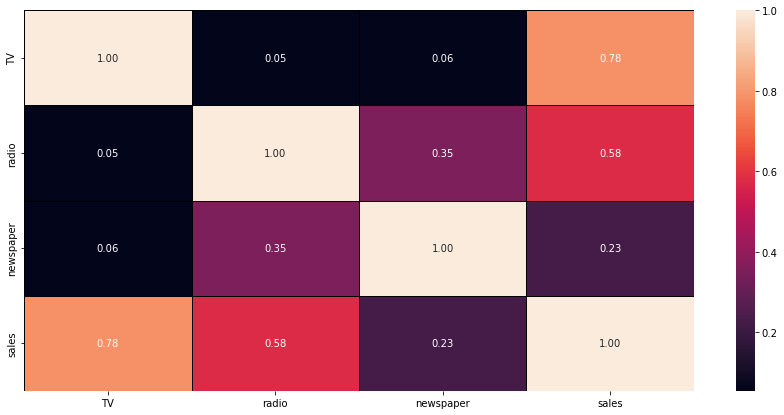

In [32]:
# Checking correlation by plotting heatmap.

plt.figure(figsize=(15,7))
sns.heatmap(Advertising.corr(),annot=True, linewidth=0.5, linecolor='black', fmt='.2f')

# Outcome of Correlation

There are positive correlation

TV has 78% correlation with the target column which can be considered as strong bond
radio has 58% correlation with the target column which can be considered as good bond
newspaper has 23% correlation with the target column which can be considered as weak bond
There is less correlation between features which means there is no multicollinearity problem.

Max Correlation: TV

Mean Correlation: newspaper

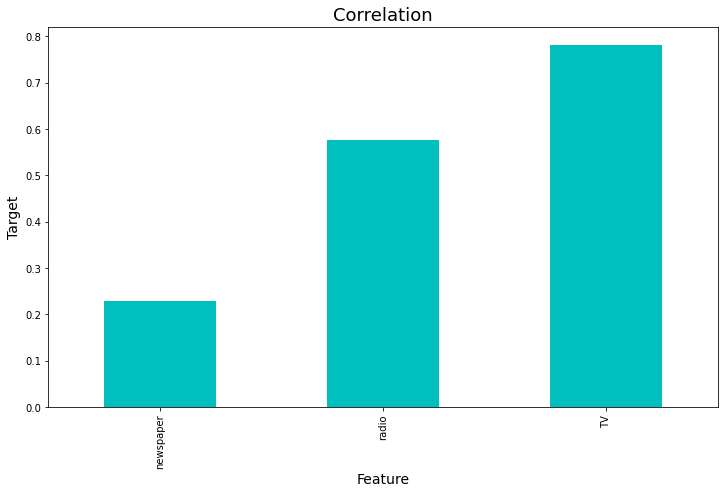

In [33]:
# Checking correlation by plotting barplot.

plt.figure(figsize=(12,7))
Advertising.corr()['sales'].sort_values(ascending=True).drop(['sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()


Observation of the correlation:

Target variable is Positively correlated with all features

Target variable "sales" is highly correlated with TV, moderately correlated with radio and less correlated with newspaper

# Checking Outliers

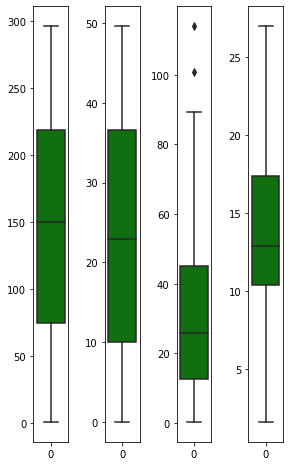

In [34]:
collist=Advertising.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=Advertising[collist[i]],color='green',orient='v')
    plt.tight_layout()

#### Observation:

Outliers present in one column: newspaper

Outliers not present in columns: TV, radio and sales

So, let's remove the outlier from the "newspaper" column

# Removing outliers

# 1. Zscore method using Scipy

In [35]:
from scipy.stats import zscore

In [36]:
variables = Advertising[['newspaper']]

z=np.abs(zscore(variables))

# Creating new dataframe
Advertising_Sales = Advertising[(z<3).all(axis=1)]
Advertising_Sales.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [37]:
z.head()

,newspaper
0,1.778945
1,0.669579
2,1.783549
3,1.286405
4,1.281802


In [38]:
print("Old DataFrame data in Rows and Column:",Advertising.shape)
print("New DataFrame data in Rows and Column:",Advertising_Sales.shape)
print("Total Dropped rows:",Advertising.shape[0]-Advertising_Sales.shape[0])

Old DataFrame data in Rows and Column: (200, 4)
New DataFrame data in Rows and Column: (198, 4)
Total Dropped rows: 2


# Percentage Data Loss using Zscore

In [39]:
loss_percent=(200-198)/200*100
print(loss_percent,"%")

1.0 %


# 2. IQR (Inter Quantile Range) method

In [41]:
#1st quantile
Q1=variables.quantile(0.25)

# 3rd quantile
Q3=variables.quantile(0.75)

#IQR
IQR=Q3 - Q1
Advertising_new=Advertising[~((Advertising < (Q1 - 1.5 * IQR)) |(Advertising > (Q3 + 1.5 * IQR))).any(axis=1)]

In [42]:
print("Old DataFrame data in Rows and Column:",Advertising.shape)
print("New DataFrame data in Rows and Column:",Advertising_new.shape)
print("nTotal Dropped rows:",Advertising.shape[0]-Advertising_new.shape[0])

Old DataFrame data in Rows and Column: (200, 4)
New DataFrame data in Rows and Column: (198, 4)
nTotal Dropped rows: 2


# Percentage Data Loss using IQR

In [43]:
loss_perc = (200-198)/200*100
loss_perc

1.0

In both method, we are getting 1 percent loss, so we can choose any of these method. I am choosing Zscore method.


# Checking for the skewness:

In [44]:
Advertising_Sales.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

Skewness threshold taken is +/-0.65. "newspaper" Column have only skewness. So, let's remove the skewness.

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

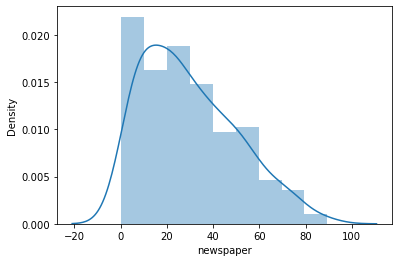

In [45]:
# Data visualization of skewed column using distplot 

sns.distplot(Advertising_Sales["newspaper"])

# Removing skewness using yeo-johnson method

In [46]:
from sklearn.preprocessing  import PowerTransformer

In [47]:
variable=["newspaper"]
scaler = PowerTransformer(method='yeo-johnson')
Advertising_Sales[variable] = scaler.fit_transform(Advertising_Sales[variable].values)
Advertising_Sales[variable].head()

,newspaper
0,1.604196
1,0.831044
2,1.607052
3,1.283768
4,1.280622


In [48]:
#checking skewness after removal
Advertising_Sales.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.101288
sales        0.407130
dtype: float64

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

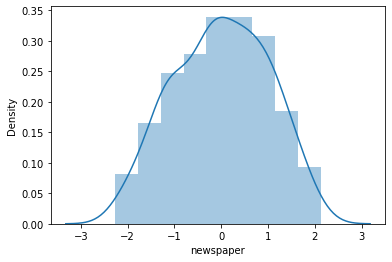

In [49]:
# checking skewness after removal through data visualization using distplot

sns.distplot(Advertising_Sales["newspaper"])

We can see the skewness has been removed and the feature "newspaper" looks normally distributed .


# Data preprocessing

### Spliting data into Target and Features:

In [50]:
x = Advertising_Sales.drop("sales", axis=1)
y = Advertising_Sales["sales"]

In [51]:
x

,TV,radio,newspaper
0,230.1,37.8,1.604196
1,44.5,39.3,0.831044
2,17.2,45.9,1.607052
3,151.5,41.3,1.283768
4,180.8,10.8,1.280622
...,...,...,...
195,38.2,3.7,-0.687435
196,94.2,4.9,-1.146090
197,177.0,9.3,-1.314437
198,283.6,42.0,1.517395


In [52]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

# Scaling data with standard scaler

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,TV,radio,newspaper
0,0.978697,0.989521,1.604196
1,-1.199012,1.090705,0.831044
2,-1.519332,1.535913,1.607052
3,0.056456,1.225616,1.283768
4,0.400243,-0.831784,1.280622
...,...,...,...
193,-1.272932,-1.310720,-0.687435
194,-0.615864,-1.229773,-1.146090
195,0.355657,-0.932968,-1.314437
196,1.606431,1.272836,1.517395


This is scaled data

# Creating Model

In [55]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, r2_score, classification_report,  mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report

In [56]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9358346827439895  on Random_state  90


# Creating train-test-split

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state = maxRS)

In [58]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((138, 3), (138,), (60, 3), (60,))

In [59]:
x.shape, y.shape

((198, 3), (198,))

As it is a continuous data , so we have to understand this by Regression problem


# Regression Algorithms

### Linear Regression

In [61]:
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
pred_LR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,pred_LR))
print('Mean abs error:',mean_absolute_error(y_test, pred_LR))
print('Mean squared error:',mean_squared_error(y_test, pred_LR))

R2_score: 0.9358346827439895
Mean abs error: 1.029386786308399
Mean squared error: 1.5796296226361315


Verifying the performance of the model by graph

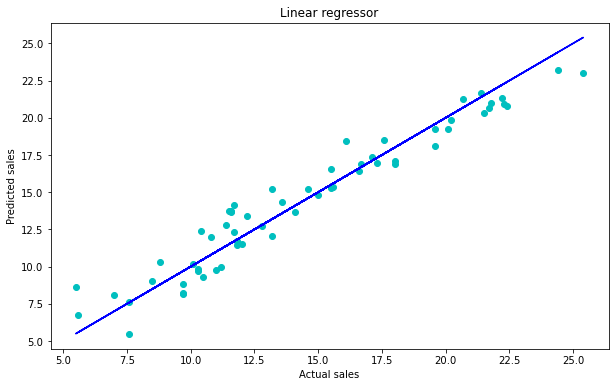

In [62]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_LR,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual sales")
plt.ylabel("Predicted sales")
plt.title("Linear regressor")
plt.show()

There is a good accuracy


## Random Forest Regressor

In [63]:
RFR=RandomForestRegressor(n_estimators=200, random_state=90)
RFR.fit(x_train,y_train)

# prediction
pred_RFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_RFR))
print('Mean abs error:',mean_absolute_error(y_test, pred_RFR))
print('Mean squared error:',mean_squared_error(y_test, pred_RFR))

R2_Score: 0.9739854190521797
Mean abs error: 0.6575999999999994
Mean squared error: 0.6404301333333344


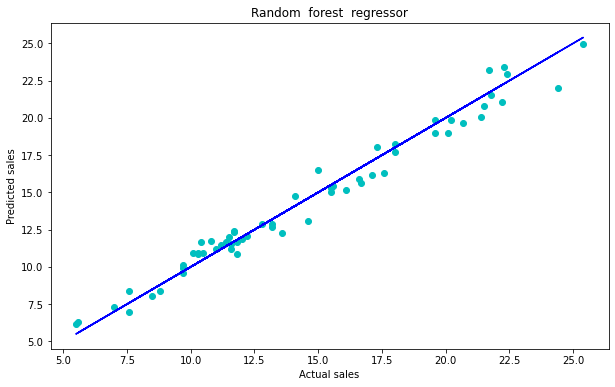

In [64]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_RFR,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual sales")
plt.ylabel("Predicted sales")
plt.title("Random  forest  regressor")
plt.show()

There is a good accuracy

# KNN Regressor

In [65]:
knn=KNN()
knn.fit(x_train,y_train)

#prediction
pred_knn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_knn))
print('Mean abs error:',mean_absolute_error(y_test, pred_knn))
print('Mean squared error:',mean_squared_error(y_test, pred_knn))

R2_Score: 0.925394255631917
Mean abs error: 0.9446666666666669
Mean squared error: 1.836653333333334


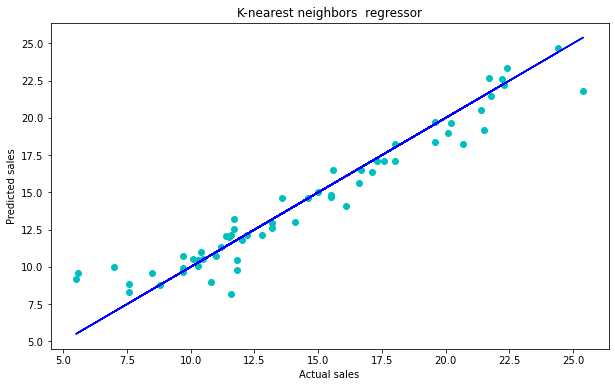

In [66]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_knn,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual sales")
plt.ylabel("Predicted sales")
plt.title("K-nearest neighbors  regressor")
plt.show()

There is a good accuracy

# Stochastic Gradient Descent Regressor

In [67]:
SGD=SGDRegressor(epsilon=1, max_iter=500, alpha=0.001,fit_intercept=True)
SGD.fit(x_train,y_train)

#prediction
pred_SGD=SGD.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_SGD))
print('Mean abs error:',mean_absolute_error(y_test, pred_SGD))
print('Mean squared error:',mean_squared_error(y_test, pred_SGD))

R2_Score: 0.93490621197399
Mean abs error: 1.04151916870741
Mean squared error: 1.6024868295317385


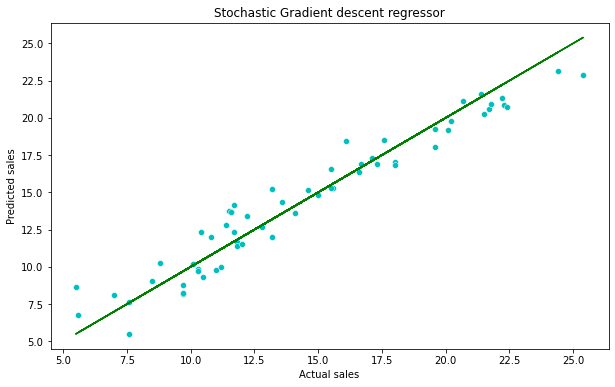

In [68]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test,y=pred_SGD,color='c')
plt.plot(y_test,y_test,color='g')
plt.xlabel("Actual sales")
plt.ylabel("Predicted sales")
plt.title("Stochastic Gradient descent regressor")
plt.show()

# Checking cross validation score

Checking CV score for Linear Regression

In [69]:
print('The CV score  for Linear_regression is :',cross_val_score(LR,x,y,cv=9).mean())

The CV score  for Linear_regression is : 0.8812869214578534


### Checking cv score for Random Forest Regression

In [70]:
print("The CV  score for  the Random forest regressor is:",cross_val_score(RFR,x,y,cv=9).mean())

The CV  score for  the Random forest regressor is: 0.9781945175791701


### Checking cv score for KNN Regression

In [71]:
print('The CV score  for  the KNN regressor is :',cross_val_score(knn,x,y,cv=9).mean())

The CV score  for  the KNN regressor is : 0.9319585778098676


### Checking cv score for SGD Regression

In [72]:
print('The  CV score for the SGD  regressor is :',cross_val_score(SGD,x,y,cv=9).mean())

The  CV score for the SGD  regressor is : 0.8819654064042047


In [73]:
score= pd.DataFrame({'CV_RFR':0.9772000164869434, 'R2_score_RFR':0.9736204897912449}, index=['0'])
score

,CV_RFR,R2_score_RFR
0,0.9772,0.97362


# Hyper parameter tuning for best model using GridsearchCV

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,4,6]}

In [76]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=6)

In [77]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=6, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [78]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

In [79]:
Adv_sales = RandomForestRegressor(criterion='mae', max_depth=6, max_features='auto', n_estimators=300)
Adv_sales.fit(x_train, y_train)
pred_GCV = Adv_sales.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_GCV)*100)

R2_Score: 96.94132605639956


# Final model Graph

Verifying the performance of the model by graph

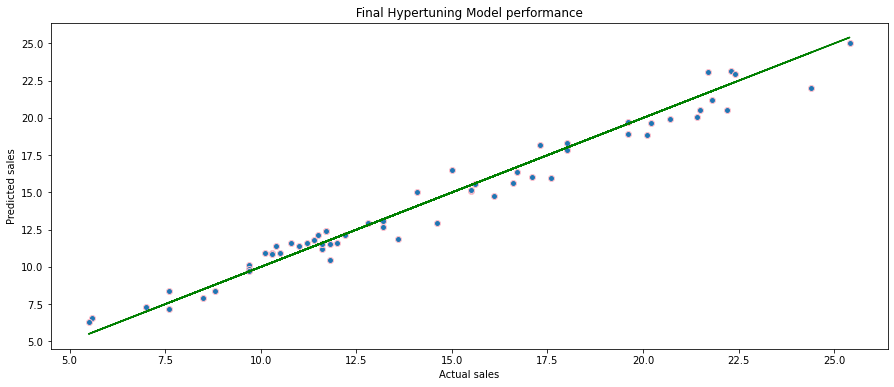

In [81]:
plt.figure(figsize=(15,6))
plt.scatter(x=y_test,y=pred_GCV, edgecolors='pink', linewidth=1, cmap='Set3')
plt.plot(y_test,y_test,color='g')
plt.xlabel("Actual sales")
plt.ylabel("Predicted sales")
plt.title(" Final Hypertuning Model performance ")
plt.show()

We are getting R2 score as 97% which is good.

# Saving the Model

In [82]:
import pickle
filename='Titanic_Train_Project.pickle'
pickle.dump(GCV,open(filename,'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

array([17.71937711,  6.38329638, 23.47664203, 19.96562393, 15.69765904,
       20.73972914, 20.89577574, 12.57473697, 23.31351189,  8.44006408,
       23.40182082, 24.88508075, 11.03097992, 19.85674863, 22.13447397,
        7.23112852, 11.70223644, 11.45491018, 15.5268621 , 10.59329279,
        7.01924646, 15.07740347, 10.8950219 , 11.02772575, 20.04340566,
       12.10397552, 11.45562708, 10.12421974, 10.968309  , 21.55682175,
       12.90615983, 10.86965281, 16.00548458,  6.10740257,  9.85391491,
       11.60969758,  9.72815777, 12.51160483, 15.53689762, 14.95968594,
       19.07466947, 12.10932149, 13.02103642, 16.71077124, 11.76026981,
       17.98195018, 15.99606341, 15.23848235, 19.14103398, 19.79012207,
       11.78396736, 12.85340619, 11.60997993,  8.39397837, 18.26121883,
       15.0614322 ,  7.9887465 , 11.69644102, 12.34986946, 11.33213771])

# Checking predicted and original values

In [83]:
a =np.array(y_test)
predicted=np.array(GCV.predict(x_test))
Sales_Adv=pd.DataFrame({'Orginal':a,'Predicted':predicted}, index=range(len(a)))
Sales_Adv

,Orginal,Predicted
0,18.0,17.719377
1,5.6,6.383296
2,22.3,23.476642
3,19.6,19.965624
4,16.6,15.697659
5,22.2,20.739729
6,21.5,20.895776
7,13.2,12.574737
8,22.4,23.313512
9,8.8,8.440064


#### As we can see, predicted and original values matches approx 100%.

In [84]:
model =Advertising_Sales.to_csv('Advertising_Sales.csv')
model